Experiment 1 Sampling & Reconstruction 

a: Write a MATLAB program to generate a sinusoidal sequence x(n) = Acos(ω0n) and plot the sequence. The input data specified by the user are the desired length L, amplitude A, and the angular frequency ω0, where 0<ω0 < π Using this program, generate the sinusoidal sequences for  (ω0 , =0, π/8, π/2, π) frequencies. 


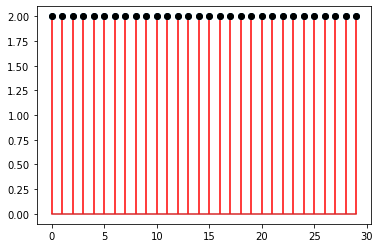

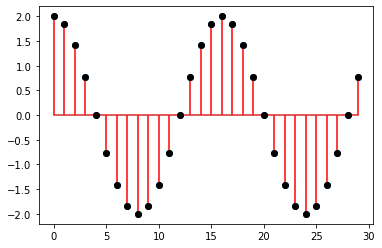

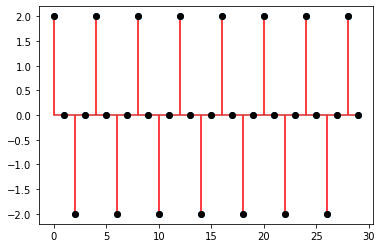

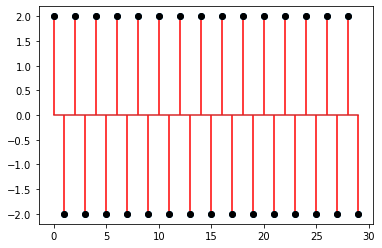

In [52]:
import matplotlib.pyplot as plt
import numpy as np 
A = 2
angles = [0, np.pi/8, np.pi/2, np.pi]
fs = 30 

for angle in angles:
    x = np.arange(fs)
    y = A * np.cos(angle * x)
    plt.figure()
    plt.stem(x,y, 'r', markerfmt ='o', label = str(angle) )
    plt.plot(x,y, 'ko')
    plt.show()

b : Generate and plot each of the following sequences over the indicated interval.



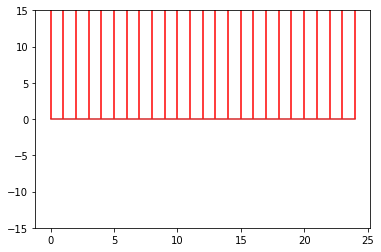

In [59]:
import matplotlib.pyplot as plt
import numpy as np 
xplot1 = [i for i in range(25)]
yplot1 = []
for n in range(0,25):
    s = 0
    for m in range(0,10):
        s= s + (m+1) * ((n-2*m)- (n-2*m-1))
    yplot1.append(s)
plt.figure()
plt.ylim(-15, 15)
plt.stem(xplot1,yplot1, 'r', markerfmt ='o')
plt.plot(xplot1,yplot1, 'ko')
plt.show()

EXP 2 : Fourier Transform 
           
Given the sinusoid

xn=2 =2 cos n π4  

Obtained by sampling the analog signal
    x(t)=2 cos(2000 π t)

with a sampling rate of fs=8000 Hz


i.  To compute the spectrum of a rectangular window function with a window size 50x50

ii. To compute the spectrum of a Hamming window function with a window size 100x100

iii. To compute the spectrum of a Hanning window function with a window size 150x150

Exp 3: To perform Discrete Convolution 

Problem Statement  : Write the program to compute the convolution of the following two sequences:
x(n) = {2,1,-3,2,1,-3,2,1,-3,2,1}, and h(n) ={1,1}. Here, x(n) is a periodic sequence.

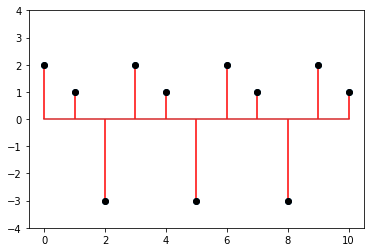

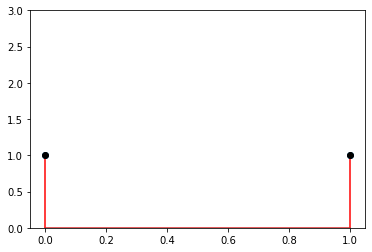

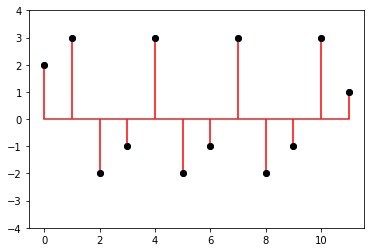

In [51]:
from scipy import signal
import numpy as np
x = [2,1,-3,2,1,-3,2,1,-3,2,1]
h = [1,1]


xx = [i for i in range(len(x))]
plt.figure()
plt.ylim(-4, 4)
plt.stem(xx, x, 'r', markerfmt ='o', label = str(angle) )
plt.plot(xx,x, 'ko')
plt.show()

hx = [i for i in range(len(h))]
plt.figure()
plt.ylim(0, 3)
plt.stem(hx, h, 'r', markerfmt ='o', label = str(angle) )
plt.plot(hx,h, 'ko')
plt.show()

x=np.array([2,1,-3,2,1,-3,2,1,-3,2,1])
h=np.array([1,1])
yy = signal.convolve(x, h)
yx = [i for i in range(len(yy))]
plt.figure()
plt.ylim(-4, 4)
plt.stem(yx, yy, 'r', markerfmt ='o', label = str(angle) )
plt.plot(yx,yy, 'ko')
plt.show()


Exp 4 : To perform Discrete Correlation 

Problem Statement : Let x(n) = {3, 11, 7, 0, -1, 4, 2} be a sampled signal transmitted towards target 
y(n) = 0.8x(n - 2) + w(n) and y(n)be the received signal. where
w(n)  is Gaussian noise sequence with mean 0 and variance 1. Compute the cross-correlation between y(n)and x(n). Use the plot to estimate the value of the delay D.

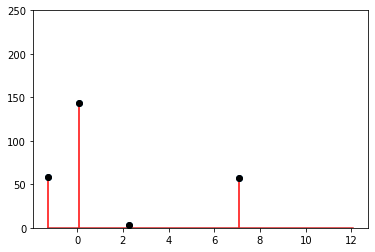

In [66]:
from scipy import signal
xn = [3, 11, 7, 0, -1, 4, 2]
xn = xn + np.random.normal(0,1,[len(xn)])
yn = []
for x in xn:
    yn.append(0.8*(x-2))
corr = signal.correlate(yn, xn, mode='same')
plt.figure()
plt.ylim(0, 250)
plt.stem(xn, corr, 'r', markerfmt ='o')
plt.plot(xn,corr, 'ko')
plt.show()

Exp 5 : To perform Discrete  Fourier Transform 

Exp 6 : Fast Fourier Transform 


Experiment 7 Image Tranformation


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

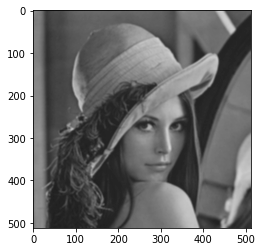

In [36]:
img_raw = cv2.imread("./blurred.png")
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

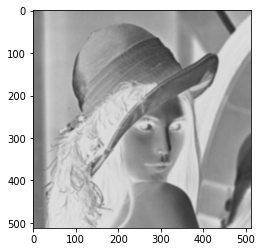

In [37]:
negative = cv2.bitwise_not(img)
plt.imshow(negative, cmap='gray', vmin=0, vmax=255)

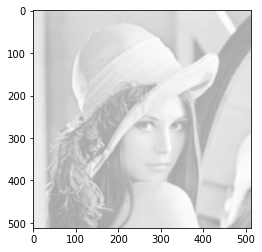

In [38]:
c = 255 / np.log(1 + np.max(img)) 
log_image = c * (np.log(img + 1)) 
log_image = np.array(log_image, dtype = np.uint8) 
plt.imshow(log_image, cmap='gray', vmin=0, vmax=255)

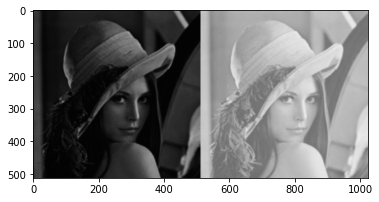

In [39]:
gamma_two_point_two = np.array(255*(img/255)**2.2,dtype='uint8')
gamma_point_four = np.array(255*(img/255)**0.4,dtype='uint8')
img3 = cv2.hconcat([gamma_two_point_two,gamma_point_four])
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

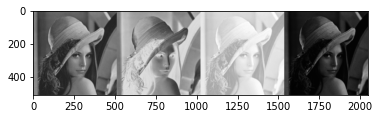

In [41]:
image1 = cv2.hconcat([img, negative, log_image, gamma_two_point_two])
plt.imshow(image1, cmap='gray', vmin=0, vmax=255)

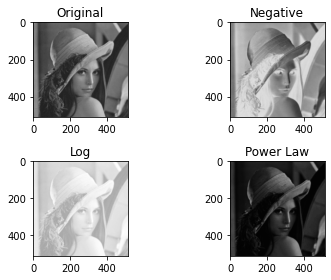

In [42]:
width=10
height=10
rows = 2
cols = 2
axes=[]
fig=plt.figure()
titles = ["Original", "Negative", "Log", "Power Law"]
images = [img, negative, log_image, gamma_two_point_two]

for a in range(len(titles)):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(titles[a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(images[a], cmap='gray', vmin=0, vmax=255)
fig.tight_layout()    
plt.show()

Experiment 8 Implementaion of Histogram Processing

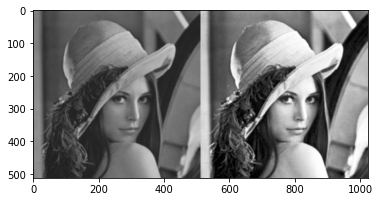

In [44]:
equalized = cv2.equalizeHist(img)
image2 = cv2.hconcat([img, equalized])
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)

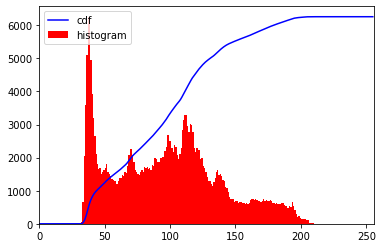

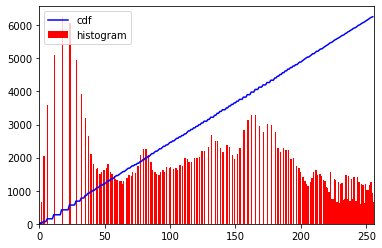

In [47]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

hist,bins = np.histogram(equalized.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Experiment 9 Image edge detection using derivative Filter